# **Step #1: Using KNN, predict the runtime of the movie**


In [16]:
# **Step #1: Import Libraries**
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import numpy as np
# **Step #2: Load Data**
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS9jPkeKJ8QUuAl-fFdg3nJPDP6vx1byvIBl4yW8UZZJ9QEscyALJp1eywKeAg7aAffwdKP63D9osF1/pub?gid=169291584&single=true&output=csv"
movie_df = pd.read_csv(url)

# **Step #3: Data Preprocessing**

# Drop the duplicated values 
movie_df = movie_df.drop_duplicates()

# Fill the null values with the mean of the column
movie_df['Runtime'] = movie_df['Runtime'].fillna(movie_df['Runtime'].mean())

# Convert the type of the column to int64

movie_df = movie_df.rename(columns = {"Runtime": "Runtime (min)"})
movie_df = movie_df.astype({"Runtime (min)": "int64"})


In [7]:
movie_df.info()
movie_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 1006
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   int64  
 2   Runtime (min)  1000 non-null   int64  
 3   Genre          1000 non-null   object 
 4   IMDB_Rating    1000 non-null   float64
 5   Overview       1000 non-null   object 
 6   Director       1000 non-null   object 
 7   Star1          1000 non-null   object 
 8   Star2          1000 non-null   object 
 9   Star3          1000 non-null   object 
 10  Star4          1000 non-null   object 
 11  No_of_Votes    1000 non-null   int64  
 12  Gross          1000 non-null   int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 109.4+ KB


,Series_Title,Released_Year,Runtime (min),Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,175,Crime,9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,152,Action,9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,202,Crime,9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,96,Crime,9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


# **Step #2: Decide independent and dependent variables**

Examining the DataFrame, choose only the numerical variables (other than `Runtime (min)`) for the features and `Runtime (min)` for the label.


In [ ]:
# features = movie_df[['Released_Year', 'IMDB_Rating', 'No_of_Votes', 'Gross', 'Genre']]
# label = movie_df['Runtime (min)']

In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
features = movie_df[['Released_Year', 'Gross', 'Star1', 'Director', 'No_of_Votes', 'IMDB_Rating', 'Genre']]
label = movie_df['Runtime (min)']

# Encode categorical variables
le = LabelEncoder()
features['Director'] = le.fit_transform(features['Director'])
features['Genre'] = le.fit_transform(features['Genre'])
features['Star1'] = le.fit_transform(features['Star1'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the KNN model
knn = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train_scaled, y_train)

# Make predictions
pred = knn.predict(X_test_scaled)

# Evaluate the model
# mse = mean_squared_error(y_test, pred)
# r2 = r2_score(y_test, pred)
# print(f"Mean Squared Error: {mse}")
# print(f"R-squared Score: {r2}")


print(f"R-squared: {r2_score(y_test, pred)}")
print(f"MAE: {mean_absolute_error(y_test, pred)}")
print(f"MSE: {mean_squared_error(y_test, pred)}")

R-squared: -0.04192790679391023
MAE: 22.377000000000002
MSE: 854.4838000000001


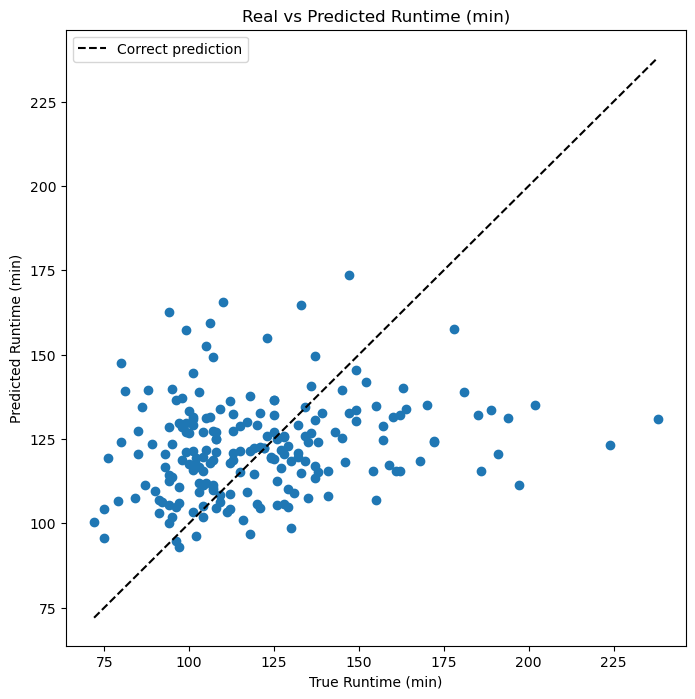

In [12]:
plt.figure(figsize=(8, 8))

plt.scatter(y_test, pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label="Correct prediction")

plt.xlabel('True Runtime (min)')
plt.ylabel('Predicted Runtime (min)')
plt.title("Real vs Predicted Runtime (min)")

plt.legend()

---
---
---


In [15]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Prepare the data
features = movie_df[['Released_Year', 'Gross', 'Star1', 'Director', 'No_of_Votes', 'IMDB_Rating', 'Genre']]
label = movie_df['Runtime (min)']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

# Define preprocessing steps
numeric_features = ['Released_Year', 'Gross', 'No_of_Votes', 'IMDB_Rating']
categorical_features = ['Star1', 'Director', 'Genre']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create a pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Define hyperparameters to search
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10]
}

# Perform grid search
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Make predictions
pred = grid_search.predict(X_test)


R-squared: 0.29125344164532385
MAE: 17.618288480008545
MSE: 581.2421842921359
Best parameters: {'regressor__max_depth': 30, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 300}


In [ ]:

# Evaluate the model
print(f"R-squared: {r2_score(y_test, pred)}")
print(f"MSE: {mean_squared_error(y_test, pred)}")
RMSE = np.sqrt(mean_squared_error(y_test, pred))
print(f"RMSE: {RMSE}")
print(f"MAE: {mean_absolute_error(y_test, pred)}")

print(f"Best parameters: {grid_search.best_params_}")

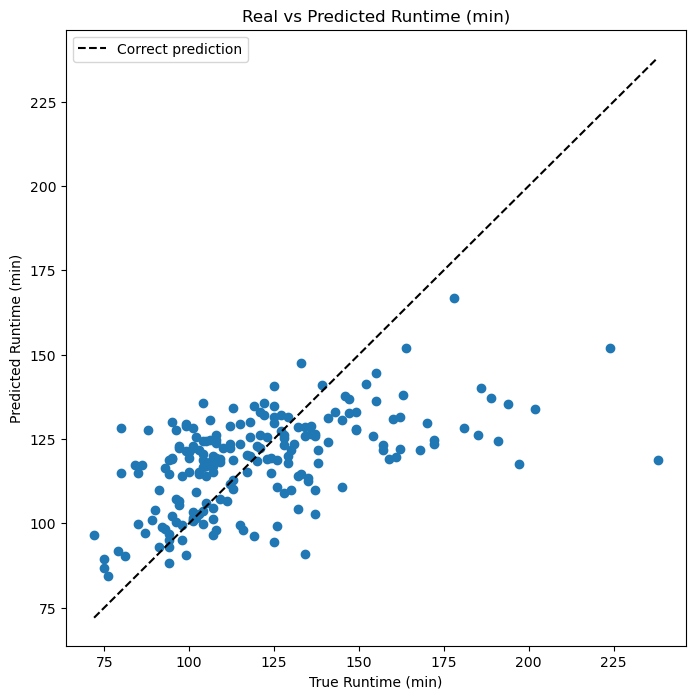

In [14]:
plt.figure(figsize=(8, 8))

plt.scatter(y_test, pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label="Correct prediction")

plt.xlabel('True Runtime (min)')
plt.ylabel('Predicted Runtime (min)')
plt.title("Real vs Predicted Runtime (min)")

plt.legend()